Included in the rebuttal

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

# import numpy as np
# import scipy.stats as st
import pandas as pd
import os
import glob
import json
from simsom.utils import *

# # Styling
plt.style.use("main_stylesheet.mplstyle")
# purple, orange, yellow, pink, blue, cyan
PALETTE = [
    "#550F6B",
    "#F18447",
    "#F8D625",
    "#BC3684",
    "#3863AC",
    "#209B8A",
]

In [8]:
RES_DIR = (
    "/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs"
)
fpath = f"{RES_DIR}/02_3.json.gz"
high = read_json_compressed(fpath)
high.keys()

dict_keys(['phi', 'verbose', 'output_cascades', 'epsilon', 'rho', 'mu', 'alpha', 'theta', 'graph_gml', 'n_threads', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'exposure_timestep', 'age_timestep', 'all_messages', 'feeds_message_ids', 'feeds_shares', 'feeds_ages'])

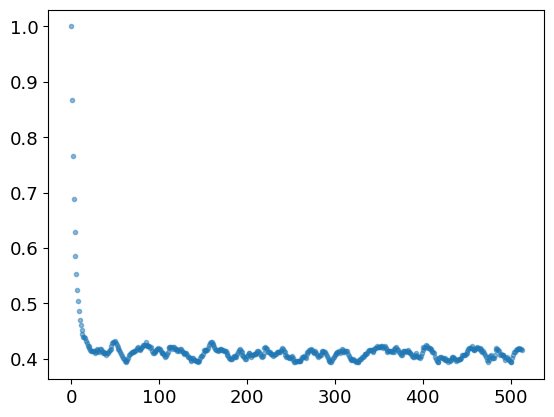

In [10]:
timesteps = len(high["quality_timestep"])
plt.scatter(range(timesteps), high["quality_timestep"], s=9, alpha=0.5)

/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/02.json.gz — timestep: 55
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/02_1.json.gz — timestep: 23
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/02_3.json.gz — timestep: 514
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/02_4.json.gz — timestep: 33
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/02_2.json.gz — timestep: 286


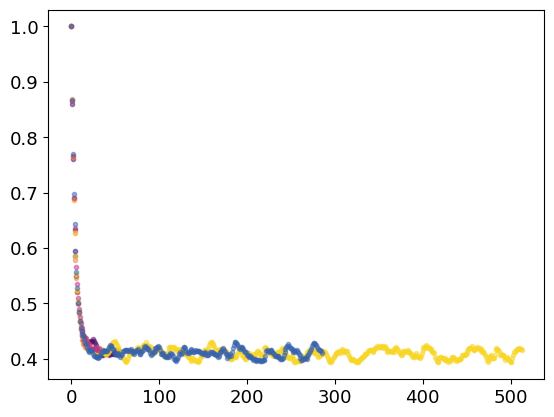

In [15]:
fpaths = glob.glob(f"{RES_DIR}/02*.json.gz")
for idx, fpath in enumerate(fpaths):
    results = read_json_compressed(fpath)
    timesteps = len(results["quality_timestep"])
    plt.scatter(
        range(timesteps),
        results["quality_timestep"],
        s=9,
        alpha=0.5,
        color=PALETTE[idx],
    )
    print(f"{fpath} — timestep: {len(results['quality_timestep'])}")

/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/03_1.json.gz — timestep: 69
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/03.json.gz — timestep: 72
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/03_3.json.gz — timestep: 96
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/03_2.json.gz — timestep: 146
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/03_4.json.gz — timestep: 52


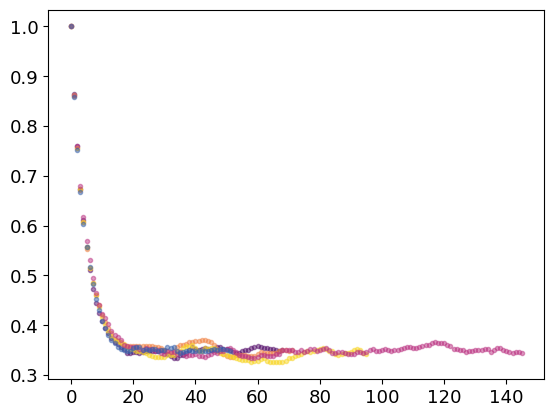

In [16]:
fpaths = glob.glob(f"{RES_DIR}/03*.json.gz")
for idx, fpath in enumerate(fpaths):
    results = read_json_compressed(fpath)
    timesteps = len(results["quality_timestep"])
    plt.scatter(
        range(timesteps),
        results["quality_timestep"],
        s=9,
        alpha=0.5,
        color=PALETTE[idx],
    )
    print(f"{fpath} — timestep: {len(results['quality_timestep'])}")

/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/03_2.json.gz — timestep: 146
/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs/02_2.json.gz — timestep: 286


Text(0.5, 1.0, 'Quality vs timestep')

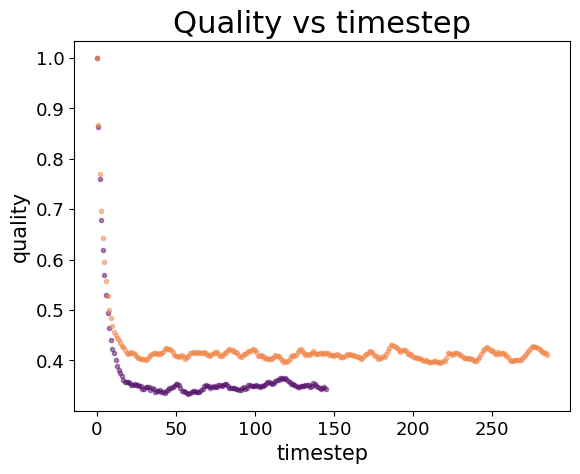

In [18]:
fnames = ["03_2.json.gz", "02_2.json.gz"]
fpaths = [f"{RES_DIR}/{fname}" for fname in fnames]
for idx, fpath in enumerate(fpaths):
    results = read_json_compressed(fpath)
    timesteps = len(results["quality_timestep"])
    plt.scatter(
        range(timesteps),
        results["quality_timestep"],
        s=9,
        alpha=0.5,
        color=PALETTE[idx],
    )
    print(f"{fpath} — timestep: {len(results['quality_timestep'])}")
plt.xlabel("timestep")
plt.ylabel("quality")
plt.title("Quality vs timestep")

In [ ]:
# Directory containing experiment results
RES_DIR = (
    "/N/project/simsom/simsom_v3/10242023_v3.3/results_verbose/vary_phigamma_5runs"
)
fpaths = glob.glob(f"{RES_DIR}/02*.json.gz")
data = []
for idx, fpath in enumerate(fpaths):
    fname = os.path.basename(fpath)
    results = json.load(
        open(
            fpath,
            "r",
        )
    )

    res_dict = {
        "fname": fname,
        "max_steps": len(results["quality_timestep"]),
        "rhoepsilon_steps": results["converged_rhoepsilon_timestep"],
        "900th step": results["quality_timestep"][-1],
        "converged by rho-epsilon": results["quality_timestep"][
            results["converged_rhoepsilon_timestep"]
        ],
    }
    data += [res_dict]
df = pd.DataFrame.from_records(data)